In [1]:
from nitime.algorithms.autoregressive import AR_est_YW, AR_psd
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import nitime

In [2]:
eeg_filename = 'OpenBCI-RAW-2019-10-25_17-13-59.txt'
start_times_filename = 'start_time.csv'

eeg_df = pd.read_csv(eeg_filename)
start_times_df = pd.read_csv(start_times_filename)


data = {
    'prawa': {
        'starts': (start_times_df['prawa'] * 1000).astype(int)
    },
    'lewa': {
        'starts': (start_times_df['lewa'] * 1000).astype(int)
    }
}


In [3]:
n_observations = 30
sampling_freq =  250
duration_secs = 5

elements_per_sample = sampling_freq * duration_secs

In [4]:
electrodes = [x for x in eeg_df.columns if x.startswith('e')]
eeg_timestamp = list(eeg_df['timestamp'].values)

def get_start_indices(eeg, starts): 
    indices = [np.where(np.array(eeg) > i)[0][0] for i in starts]
    return indices

for condition in data.keys():
    data[condition]['indices'] = get_start_indices(eeg_timestamp, data[condition]['starts'])

In [5]:
#zrobic array 
sample_dim = duration_secs * sampling_freq

prawa_data = np.zeros((n_observations, sample_dim))
lewa_data = np.zeros((n_observations, sample_dim))

In [6]:
conditions = data.keys()
for condition in conditions: 
    data[condition]['electrodes'] = {
        e: np.zeros((n_observations, sample_dim)) for e in electrodes
    }

for condition in conditions: 
    for e in electrodes:
        for i in range(n_observations):
            start_idx = data[condition]['indices'][i]
            data[condition]['electrodes'][e][i] = eeg_df[e].values[start_idx:start_idx+sample_dim]
            data[condition]['electrodes'][e][i] -= np.mean(data[condition]['electrodes'][e][i])

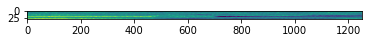

In [7]:
electrode = 'e4'
plt.imshow(data['prawa']['electrodes'][electrode])

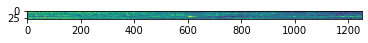

In [8]:
plt.imshow(data['lewa']['electrodes'][electrode])

In [9]:
AR_DIM = 1
for condition in conditions: 
    data[condition]['a'] = {}
    data[condition]['sigma'] = {}
    data[condition]['psd'] = {}
    for e in electrodes:
        a = np.zeros((n_observations, AR_DIM))
        sigmas = np.zeros((n_observations,AR_DIM))
        for i in range(n_observations):
            a[i], sigmas[i] = AR_est_YW(data[condition]['electrodes'][e][i], AR_DIM)
        data[condition]['a'][e] = a
        data[condition]['sigma'][e] = sigmas
        data[condition]['psd'][e]= AR_psd(a.reshape(-1), sigmas.reshape(-1))
        

/Users/agatawlaszczyk/Documents/bci/openbci/lib/python3.6/site-packages/scipy/fftpack/basic.py:151: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


prawa
e1


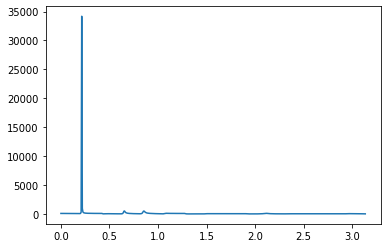

e2


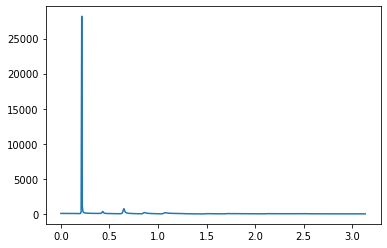

e3


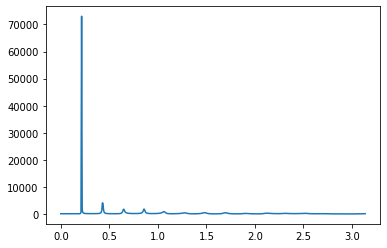

e4


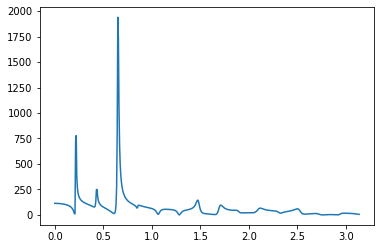

e5


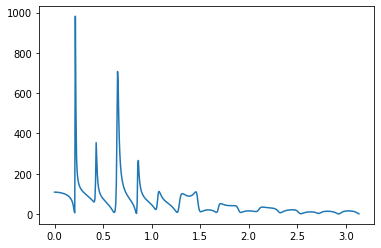

e6


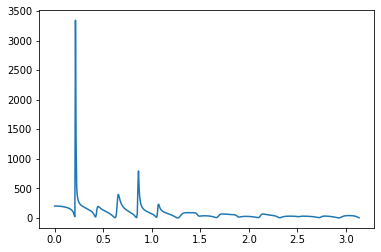

e7


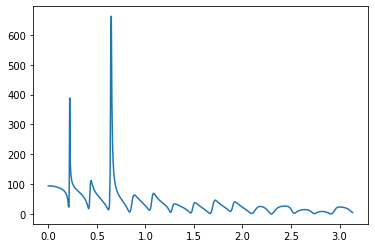

e8


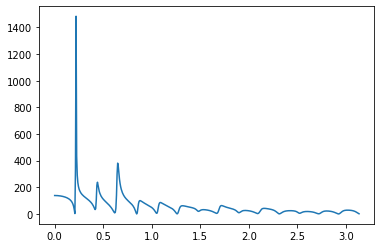

lewa
e1


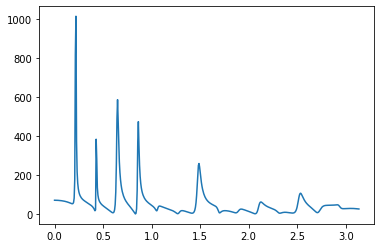

e2


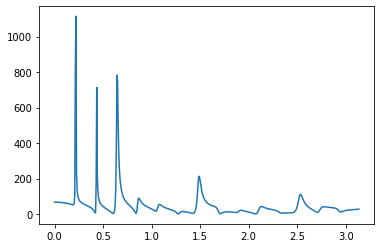

e3


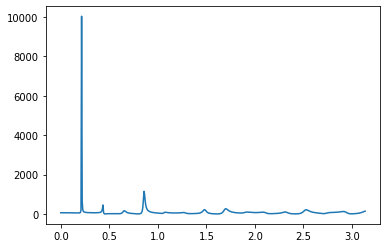

e4


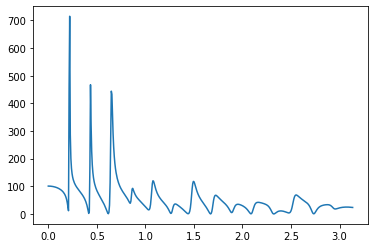

e5


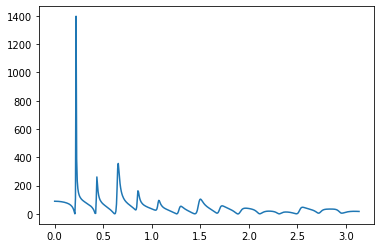

e6


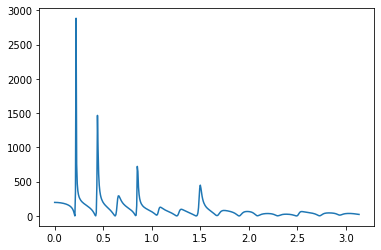

e7


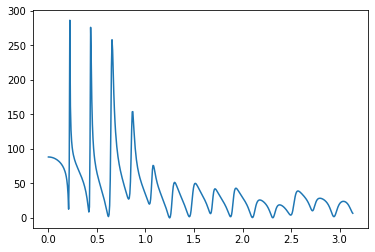

e8


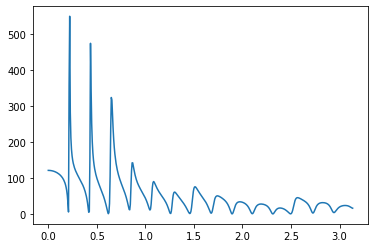

In [11]:
for condition in conditions:
    print(condition)
    for e in electrodes:
        print(e)
        plt.plot(data[condition]['psd'][e][0], data[condition]['psd'][e][1])
        plt.show()

e1


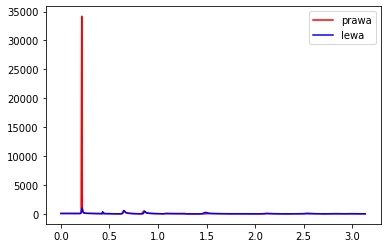

e2


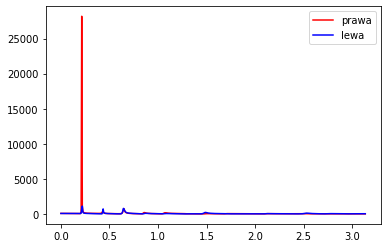

e3


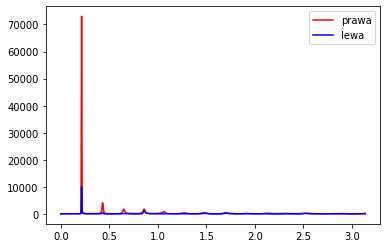

e4


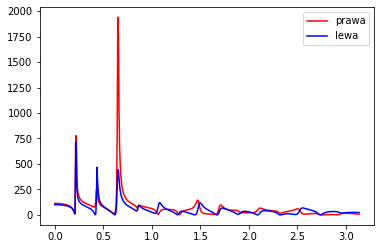

e5


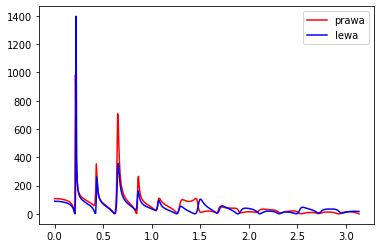

e6


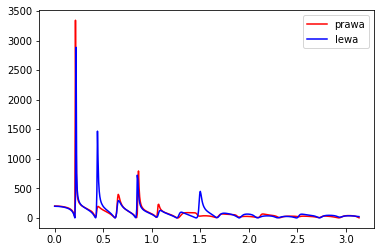

e7


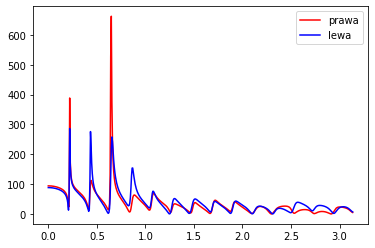

e8


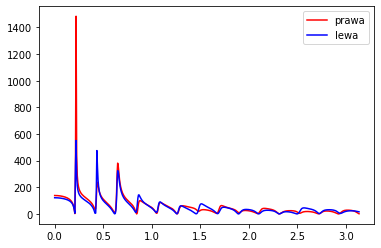

In [14]:
for e in electrodes:
    print(e)
    plt.plot(data['prawa']['psd'][e][0], data['prawa']['psd'][e][1], color='red', label='prawa')
    plt.plot(data['lewa']['psd'][e][0], data['lewa']['psd'][e][1], color='blue', label='lewa')
    plt.legend()
    plt.show()

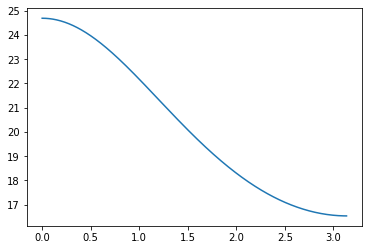

In [19]:
plt.plot(AR_psd(10,1000)[0], AR_psd(10,1000)[1])

In [21]:
sum(np.array([2,3,4,5]) - np.array([1,2,3,4]))

4

In [ ]:
sum(np.array([2,3,4,5]) - np.array([1,2,3,4]))